In [ ]:
!pip install stopwords

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
sns.set()
from textblob import TextBlob
import stopwords
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("./Sequence_Text_Creation.csv")

In [ ]:
df.head()

,Unnamed: 0,text
0,0,Multiple factors make it a candidate wellsuite...
1,1,Hurt CaltechIPAC TESS stares at a large swath ...
2,2,Capturing transits brief regular dimmings of ...
3,3,Although we dont yet know whether it possesses...
4,4,The host star called Gliese is a cool red dwa...


In [ ]:
df.tail()

,Unnamed: 0,text
1120,1120,This is a problem of informationthe idea that ...
1121,1121,This means that a black hole must contain a lo...
1122,1122,But there is a limit to the amount of informat...
1123,1123,Information requires energy and energy has mas...
1124,1124,So if theres too much information in a region ...


In [ ]:
df.describe()

,Unnamed: 0
count,1125.000000
mean,562.000000
std,324.903832
min,0.000000
25%,281.000000
50%,562.000000
75%,843.000000
max,1124.000000


# Phân tích quan điểm

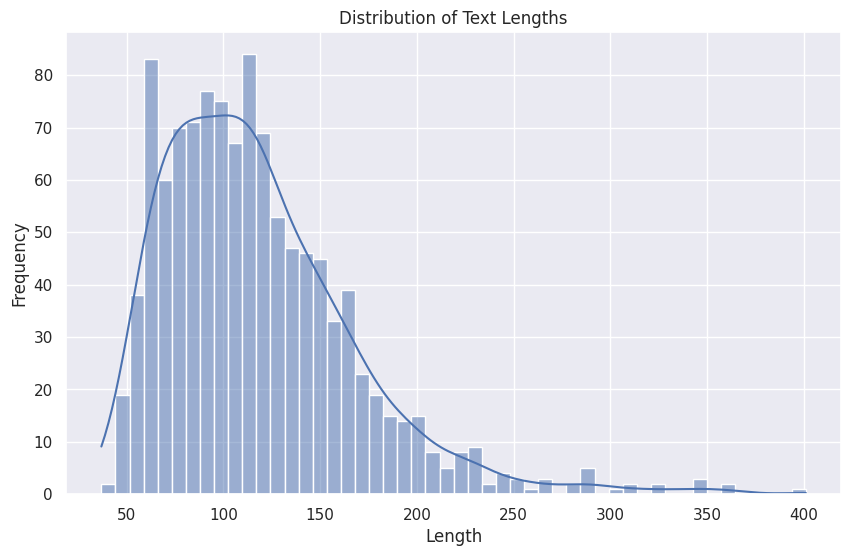

In [ ]:
df['length'] = df['text'].apply(len)
df.head()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

- Đa số các văn bản có độ dài từ 50 đến 150 ký tự.
- Có một số ít văn bản có độ dài trên 200 ký tự.
- Điều này cho thấy rằng các văn bản trong tập dữ liệu tương đối ngắn gọn.

Tính ảnh hưởng văn bản

In [ ]:
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['polarity'] = df['text'].apply(get_polarity)

Tính chủ quan của văn bản

In [ ]:
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['subjectivity'] = df['text'].apply(get_subjectivity)

In [ ]:
df[['length', 'polarity','subjectivity', 'text']]

,length,polarity,subjectivity,text
0,104,0.000000,0.250000,Multiple factors make it a candidate wellsuite...
1,193,0.214286,0.428571,Hurt CaltechIPAC TESS stares at a large swath ...
2,130,0.133333,0.303419,Capturing transits brief regular dimmings of ...
3,198,0.000000,0.400000,Although we dont yet know whether it possesses...
4,108,0.175000,0.325000,The host star called Gliese is a cool red dwa...
...,...,...,...,...
1120,113,0.000000,0.000000,This is a problem of informationthe idea that ...
1121,100,-0.111111,0.272222,This means that a black hole must contain a lo...
1122,85,0.000000,0.000000,But there is a limit to the amount of informat...
1123,82,0.500000,1.000000,Information requires energy and energy has mas...


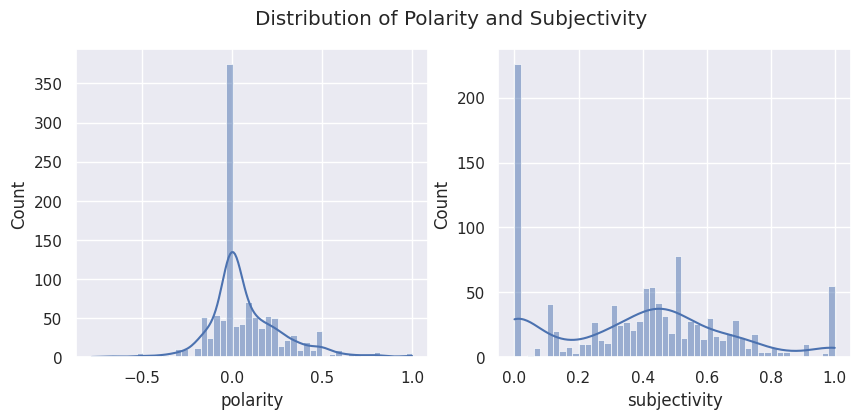

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.histplot(df['polarity'], bins=50, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['subjectivity'], bins=50, kde=True)

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

- Biểu đồ phân bố ảnh hưởng của văn bản cho thấy rằng hầu hết các văn bản trong tập dữ liệu chủ yếu mức 0(neutral). Điều này có nghĩa là các văn bản không thể hiện bất kỳ tình cảm tích cực hay tiêu cực rõ ràng nào.
- Ngược lại, biểu đồ phân bố chủ quan của văn bản cho thấy rằng hầu hết các văn bản trong tập dữ liệu có tính chủ quan thấp. Điều này có nghĩa là các văn bản này có xu hướng trình bày thông tin một cách khách quan, không mang nhiều cảm xúc cá nhân.
- Nhìn chung, hai biểu đồ này cho thấy rằng các văn bản không thích hợp cho việc phân tích cảm xúc

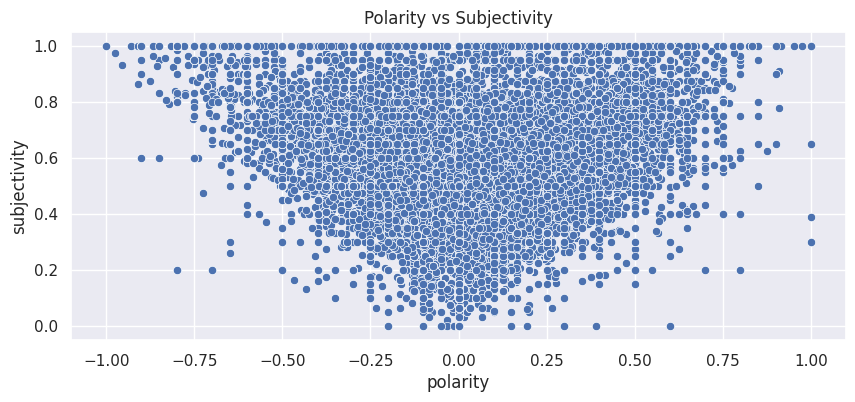

In [ ]:
sns.scatterplot(x = df['polarity'], y = df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

- Biểu đồ thể hiện mối quan hệ giữa polarity và subjectivity của các văn bản trong tập dữ liệu. Hầu hết các văn bản có sự ảnh hưởng dương và tính chủ quan thấp. Điều này có nghĩa là các văn bản này có xu hướng thể hiện cảm xúc tích cực một cách khách quan.
- Có một số ít văn bản có ảnh hưởng thấp và tính chủ quan cao. Điều này có nghĩa là các văn bản này có xu hướng thể hiện cảm xúc tiêu cực một cách chủ quan.
- Nhìn chung, biểu đồ này cho thấy rằng các văn bản trong tập dữ liệu có xu hướng thể hiện cảm xúc tích cực và khách quan.

<Axes: xlabel='polarity', ylabel='length'>

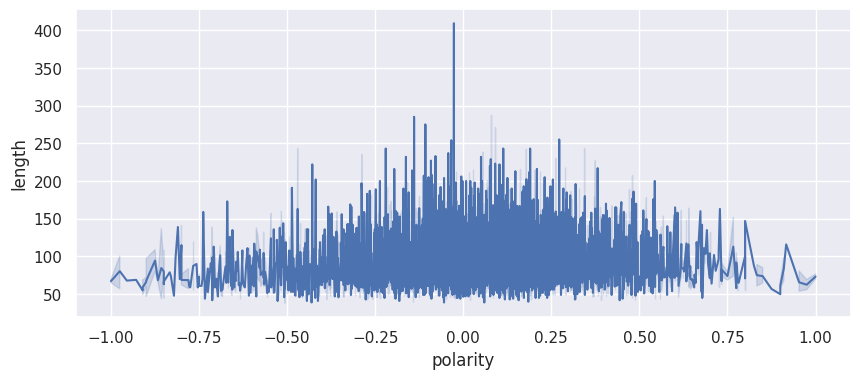

In [ ]:
sns.lineplot(x=df['polarity'], y=df['length'])

- Biểu đồ đầu tiên cho thấy mối quan hệ giữa polarity và length của các văn bản trong tập dữ liệu. Hầu hết các văn bản có polarity dương có độ dài ngắn. Điều này có nghĩa là các văn bản này có xu hướng thể hiện cảm xúc tích cực một cách ngắn gọn.
- Có một số ít văn bản có polarity âm có độ dài dài. Điều này có nghĩa là các văn bản này có xu hướng thể hiện cảm xúc tiêu cực một cách dài dòng.
- Nhìn chung, biểu đồ này cho thấy rằng các văn bản trong tập dữ liệu có xu hướng thể hiện cảm xúc tích cực một cách ngắn gọn.

<Axes: xlabel='subjectivity', ylabel='length'>

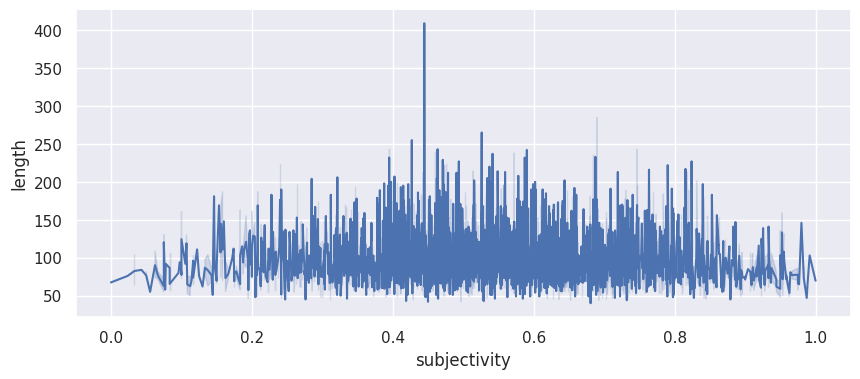

In [ ]:
sns.lineplot(x=df['subjectivity'], y=df['length'])

- Biểu đồ thứ hai cho thấy mối quan hệ giữa subjectivity và length của các văn bản trong tập dữ liệu. Hầu hết các văn bản có subjectivity thấp có độ dài ngắn. Điều này có nghĩa là các văn bản này có xu hướng trình bày thông tin một cách khách quan và ngắn gọn.
- Có một số ít văn bản có subjectivity cao có độ dài dài. Điều này có nghĩa là các văn bản này có xu hướng trình bày thông tin một cách chủ quan và dài dòng.
- Nhìn chung, biểu đồ này cho thấy rằng các văn bản trong tập dữ liệu có xu hướng trình bày thông tin một cách khách quan và ngắn gọn.

# Trực quan hóa số lượng từ dừng có trong tập dữ liệu

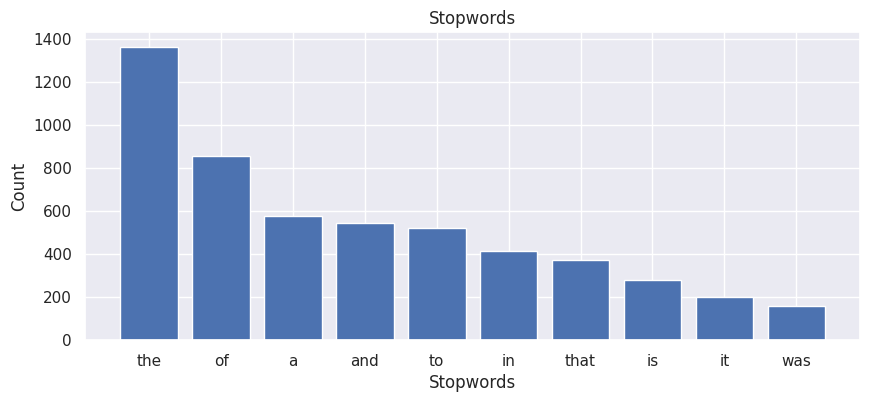

In [ ]:
data=df['text']
stop=set(stopwords.get_stopwords('english'))
data_split= data.str.split()
data_list=data_split.values.tolist()
corpus=[word for i in data_list for word in i]
from collections import defaultdict
dictionary_stopwords=defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary_stopwords[word]+=1

top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.xlabel('Stopwords')
plt.ylabel('Count')
plt.title('Stopwords')
plt.show()

- Biểu đồ cho thấy các từ dừng xuất hiện nhiều nhất trong tập dữ liệu là "the", "a", "an", "in", "on", "at", "of", "to", "for", "by".
- Điều này cho thấy rằng các văn bản trong tập dữ liệu thường sử dụng các từ dừng này.
- Các từ dừng này có thể được loại bỏ khỏi tập dữ liệu trước khi thực hiện các tác vụ xử lý ngôn ngữ tự nhiên, chẳng hạn như phân tích tình cảm hoặc tóm tắt văn bản.

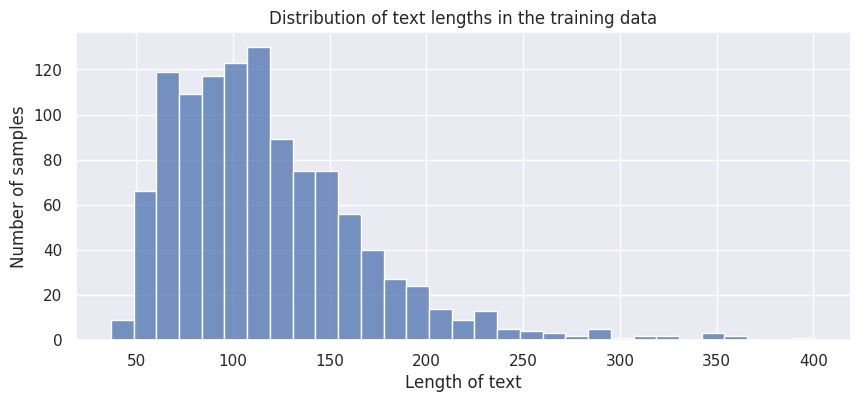

In [ ]:
sns.histplot(df['text'].apply(lambda x: len(x)))
plt.xlabel('Length of text')
plt.ylabel('Number of samples')
plt.title('Distribution of text lengths in the training data')
plt.show()

- Biểu đồ thể hiện phân bố độ dài của các văn bản trong tập dữ liệu. Đa số các văn bản có độ dài dưới 100 ký tự.
- Có một số ít văn bản có độ dài trên 200 ký tự.
- Điều này cho thấy rằng các văn bản trong tập dữ liệu tương đối ngắn gọn.

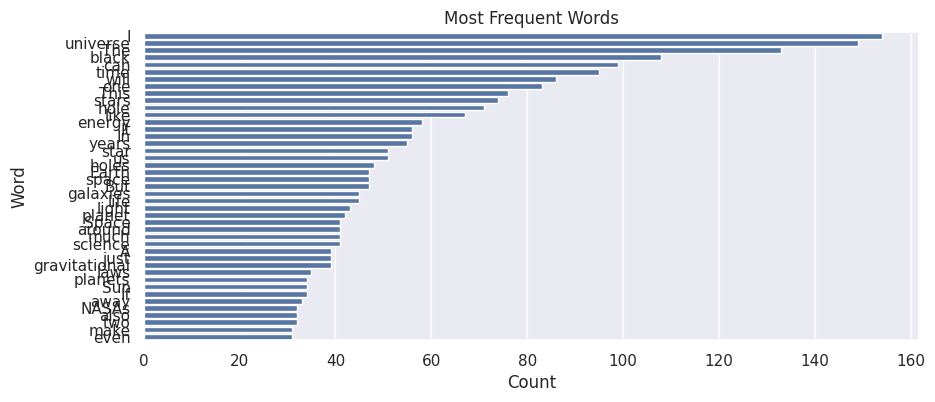

In [ ]:
data=df['text']
stop=set(stopwords.get_stopwords('english'))
data_split= data.str.split()
data_list=data_split.values.tolist()
corpus=[word for i in data_list for word in i]
counter=Counter(corpus)
mostCommon=counter.most_common()
x, y=[], []
for word,count in mostCommon[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Most Frequent Words')
plt.show()

# Word cloud

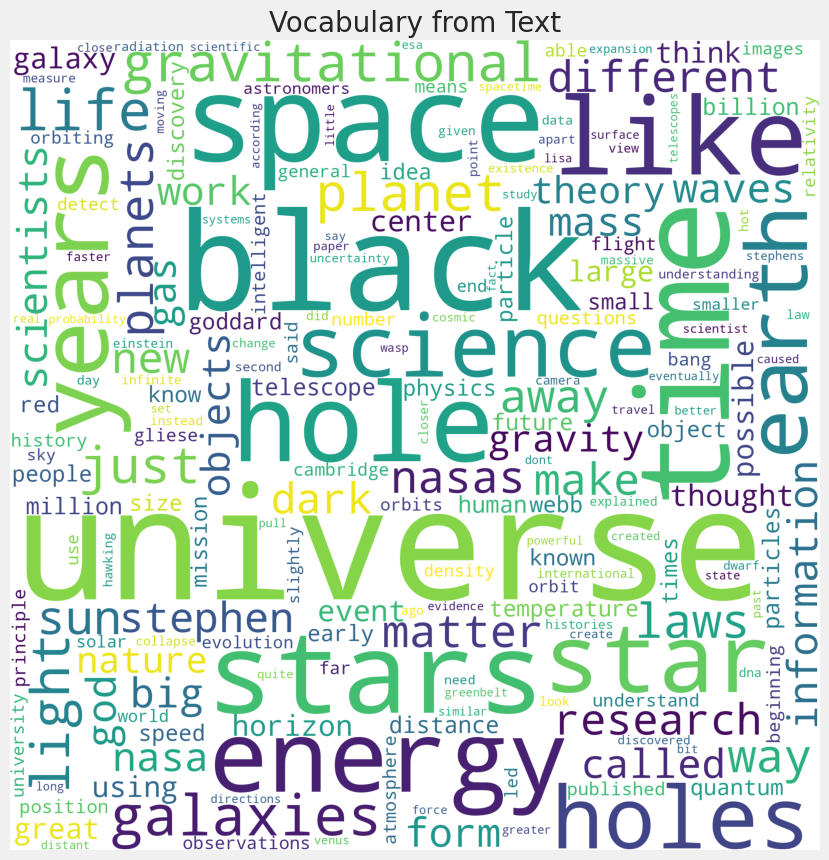

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Text", fontsize = 20)
plt.show()

Nhận thấy những từ xuất hiện nhiều trong các văn bản như "universe", "starts", "science", "space", "like". Điều đó có thể kết luận tập dữ liệu này đang lấy từ nguồn có nội dung liên quan đế vũ trụ